In [ ]:
#upload data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/zhiyzuo/python-modularity-maximization.git

In [ ]:
cd python-modularity-maximization/

In [ ]:
!python setup.py install

In [ ]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
#from modularity_maximization.utils import get_modularity

In [ ]:
#read data 
instagram_data = pd.read_csv(r'/content/drive/MyDrive/data/Instagram User Stats.csv')
#instagram_data.drop('id', axis = 1, inplace = True)
lpos=[]
lflr=[]
lflg=[]
leg=[]
ler=[]
lfg=[]
lop=[]
for i in instagram_data.index:
  if (instagram_data['id'][i]<=10000):
    lpos.append(instagram_data['pos'][i])
    lflr.append(instagram_data['flr'][i])
    lflg.append(instagram_data['flg'][i])
    leg.append(instagram_data['eg'][i])
    ler.append(instagram_data['er'][i])
    lfg.append(instagram_data['fg'][i])
    lop.append(instagram_data['op'][i])
  else:
    break    
df=pd.DataFrame({"pos":lpos,
                "flr":lflr,
                "flg":lflg,"eg":leg,"er":leg,"fg":lfg,"op":lop,}) 
scaler = StandardScaler()
instagram_data_scaled = scaler.fit_transform(df)

In [ ]:
print(instagram_data_scaled)

In [ ]:
#model autoencoder
input_df = Input( shape = (7, ))
x = Dense(5, activation = 'relu')(input_df)
#x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(3, activation ='relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(5, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(7, kernel_initializer='glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#training data 
autoencoder.fit(instagram_data_scaled, instagram_data_scaled, batch_size= 120, epochs = 20, verbose = 1)

Epoch 1/20
84/84 [==============================] - 0s 2ms/step - loss: 1.0340
Epoch 2/20
84/84 [==============================] - 0s 2ms/step - loss: 0.9201
Epoch 3/20
84/84 [==============================] - 0s 2ms/step - loss: 0.7758
Epoch 4/20
84/84 [==============================] - 0s 2ms/step - loss: 0.6958
Epoch 5/20
84/84 [==============================] - 0s 2ms/step - loss: 0.6410
Epoch 6/20
84/84 [==============================] - 0s 2ms/step - loss: 0.6288
Epoch 7/20
84/84 [==============================] - 0s 2ms/step - loss: 0.5258
Epoch 8/20
84/84 [==============================] - 0s 2ms/step - loss: 0.4723
Epoch 9/20
84/84 [==============================] - 0s 2ms/step - loss: 0.4128
Epoch 10/20
84/84 [==============================] - 0s 2ms/step - loss: 0.3567
Epoch 11/20
84/84 [==============================] - 0s 2ms/step - loss: 0.3301
Epoch 12/20
84/84 [==============================] - 0s 2ms/step - loss: 0.3570
Epoch 13/20
84/84 [==============================

In [ ]:
#predect data compression
pred = encoder.predict(instagram_data_scaled)

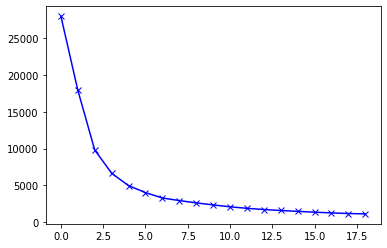

In [ ]:
#elbow method(choose the optimal k)
score_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    score_2.append(kmeans.inertia_)
plt.plot(score_2, 'bx-')

In [ ]:
#kmeans algorithm
import sklearn
kmeans = KMeans(5)
kmeans.fit(pred)
labels = kmeans.labels_
#metrics
silhouette_avg = silhouette_score(pred, labels)
Davies_community= sklearn.metrics.davies_bouldin_score(pred, labels)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred, labels)  

print(Calinski_Harabaz)
print(Davies_community)
print(silhouette_avg)

11643.661643955837
0.6755404431003083
0.4544703


In [ ]:
print(labels)

In [ ]:
#use this code when you need to save the list of label 
fichier = open("l10000features_kmeansAE.txt", "w")
st=""
for i in labels:
  st=str(i)
  #print(st)
  fichier.write(st+" ")
fichier.write(st+"\n")    
fichier.close()

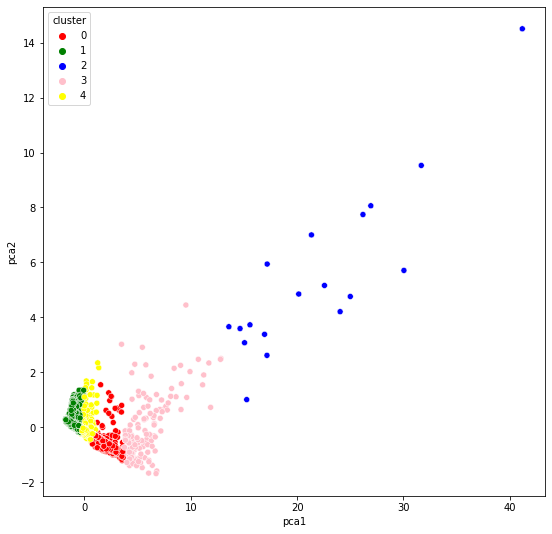

In [ ]:
#instagram network
pca = PCA(n_components = 2)
principal_comp2 = pca.fit_transform(pred)
pca_df2 = pd.DataFrame(data = principal_comp2, columns = ['pca1', 'pca2'])
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster': labels})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df2, palette = ['red','green','blue','pink','yellow'])
#palette = ['red','green','blue','pink','brown','yellow']